In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')
import time
import seaborn.objects as so
from seaborn import *

Mounted at /content/drive


Three sources of data for this project:

1.   Kaggle, "The Movies Dataset"
Contains revenue information up to 2017 (note: excludes much of the streaming era)
2.   Kaggle, "The Oscar Award, 1927 - 2024"
Contains Oscar award information
3.  IMDB, contains titles and title IDs used as the unique IDs for this analysis, ratings, region, language, etc. Data up to 2024

IMDB data available at: https://datasets.imdbws.com/

If preferred, please email me a request at emily.kibbler@maine.edu and I will provide a zip file with all inputs (raw and processed data).




**Eras of Hollywood, defined for analysis:**


Early: before 1930

Golden Age: 1930-1948

Fall of the Studios: 1949-1965

New Hollywood: 1966-1983

Blockbuster: 1984 to 2016

Streaming: 2017 to now

Sources: https://tvtropes.org/pmwiki/pmwiki.php/Main/HistoryOfHollywood
https://en.wikipedia.org/wiki/New_Hollywood
http://www.historyoffilm.net/movie-eras/history-of-cinema/
https://en.wikipedia.org/wiki/Streaming_media
https://en.wikipedia.org/wiki/Streaming_television
https://www.nytimes.com/2019/11/18/business/media/streaming-hollywood-revolution.html

In [ ]:
# Start a clock to calculate total run time at the end
start_time = time.time()

# Data import and manipulation

Important note:

Do not run this code here. It will crash colab.

I ran it locally with PyCharm. I am including for project completeness and documentation.

Locally, this took about 60 second to run, which I did add to the total in my presentation (I reported 22 minutes)


In [ ]:
# First import and trim of data, which was run locally

# start_time = time.time()

# titles_ids = pd.read_csv("title.akas.tsv", sep = "\t")
# # print(titles_ids.shape) # 48,911,203 lines x 8 columns

# titles_types = pd.read_csv("title.basics.tsv", sep = "\t")
# titles_types_movies = titles_types[titles_types["titleType"] == "movie"]
# print("title basics shape:", titles_types.shape) # 10916255 x9

# imdb_movies = titles_types_movies.merge(titles_ids, how="left", left_on="tconst", right_on="titleId")
# # imdb_movies.to_csv("imdb_movies.csv", index=False)

# imdb_movies_us = imdb_movies[imdb_movies["region"] == "US"]
# print(imdb_movies_us.shape) # 355,153 lines x 17
# with pd.option_context("display.max_columns", 20):
#     print(imdb_movies_us.head())

# imdb_movies_us.to_csv("imdb_movies_us.csv", index=False)
# print("Run time was:", time.time() - start_time)


In [ ]:
# The data set from imdb is enormous (4.89e7 lines long) and needs significant trimming before analysis
# The import crashed my session multiple times so I did some trimming locally in PyCharm (see above)


imdb = pd.read_csv("/content/drive/MyDrive/DSE_503/imdb_movies_us.csv")
# Note to self, these IDs may not be unique because some films have alternate titles

display(imdb.columns)
display(imdb.head())
display(imdb.shape)




<ipython-input-4-efcd7806c87f>:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb = pd.read_csv("/content/drive/MyDrive/DSE_503/imdb_movies_us.csv")


Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'titleId',
       'ordering', 'title', 'region', 'language', 'types', 'attributes',
       'isOriginalTitle'],
      dtype='object')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,tt0000009,4.0,Miss Jerry,US,\N,imdbDisplay,\N,0.0
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",tt0000147,2.0,The Corbett-Fitzsimmons Fight,US,\N,imdbDisplay,\N,0.0
2,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",tt0000574,5.0,The Story of the Kelly Gang,US,\N,imdbDisplay,\N,0.0
3,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,tt0000591,3.0,The Prodigal Son,US,\N,\N,\N,0.0
4,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,tt0000630,4.0,Hamlet,US,\N,\N,\N,0.0


(355153, 17)

In [ ]:
# Import ratings data and merge with the titles and IDs

imdb_ratings = pd.read_csv("/content/drive/MyDrive/DSE_503/title.ratings.tsv", sep = "\t")
print("imdb ratings shape:", imdb_ratings.shape) #1454240 x 3
# Different naming for the title ID; rename to match the first data set
imdb_ratings.rename(columns = {"tconst":"titleId"}, inplace = True)
# Doing left join in case some titles do not have ratings
titles_and_ratings = imdb.merge(imdb_ratings, how = "left", left_on = "titleId", right_on = "titleId")
titles_and_ratings.head()
print(titles_and_ratings.shape)

# inspect items with no ratings for curiosity
display(titles_and_ratings[titles_and_ratings["numVotes"].isna()].head(n=20))
print(titles_and_ratings[titles_and_ratings["numVotes"].isna()].shape)
# Not going to drop NAs at this time but interesting to note that about half of these data points lack rating

print(titles_and_ratings.shape)
titles_and_ratings.head()

# Pass this data frame into a csv so I can work on it later even if there is a session disconnect
titles_and_ratings.to_csv("/content/drive/MyDrive/DSE_503/titles_and_ratings.csv")

imdb ratings shape: (1454240, 3)
(355153, 19)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
16,tt0001422,movie,Trail to the West,Trail to the West,0,1910,\N,\N,\N,tt0001422,3.0,Trail to the West,US,\N,imdbDisplay,\N,0.0,NaN,NaN
18,tt0001515,movie,The Brand,The Brand,0,1911,\N,\N,\N,tt0001515,2.0,The Brand,US,\N,imdbDisplay,\N,0.0,NaN,NaN
24,tt0001628,movie,The Four Poster Pest,The Four Poster Pest,0,1911,\N,\N,\N,tt0001628,2.0,The Four Poster Pest,US,\N,imdbDisplay,\N,0.0,NaN,NaN
26,tt0001731,movie,The Convict Hero,The Life of Rufus Dawes,0,1911,\N,\N,Drama,tt0001731,2.0,The Convict Hero,US,\N,imdbDisplay,\N,0.0,NaN,NaN
30,tt0001914,movie,The Devil's Assistant,Die Sünden der Väter,0,1913,\N,\N,Drama,tt0001914,13.0,Regina,US,\N,\N,\N,0.0,NaN,NaN
31,tt0001914,movie,The Devil's Assistant,Die Sünden der Väter,0,1913,\N,\N,Drama,tt0001914,14.0,The Devil's Assistant,US,\N,imdbDisplay,\N,0.0,NaN,NaN
34,tt0002001,movie,The Alaska-Siberian Expedition,The Alaska-Siberian Expedition,0,1912,\N,\N,Documentary,tt0002001,2.0,The Alaska-Siberian Expedition,US,\N,imdbDisplay,\N,0.0,NaN,NaN
36,tt0002039,movie,Atop of the World in Motion,Atop of the World in Motion,0,1912,\N,\N,Documentary,tt0002039,2.0,Atop of the World in Motion,US,\N,imdbDisplay,\N,0.0,NaN,NaN
40,tt0002102,movie,The Clod,The Clod,0,1912,\N,\N,\N,tt0002102,2.0,The Clod,US,\N,imdbDisplay,\N,0.0,NaN,NaN
41,tt0002109,movie,The Colonel's Son,The Colonel's Son,0,1912,\N,\N,\N,tt0002109,2.0,The Colonel's Son,US,\N,imdbDisplay,\N,0.0,NaN,NaN


(142107, 19)
(355153, 19)


In [ ]:
oscars = pd.read_csv("/content/drive/MyDrive/DSE_503/the_oscar_award.csv")
oscars
print(oscars.shape) #10889 x 7
# Oscars categories have changed over the years
# Look at list of all potential categories
print(sorted(oscars["category"].unique()))
print(oscars[oscars["category"].str.contains("PICTURE")]["category"].unique())
# These outputs will help me determine search keys for the category I want (later)

(10889, 7)
['ACTOR', 'ACTOR IN A LEADING ROLE', 'ACTOR IN A SUPPORTING ROLE', 'ACTRESS', 'ACTRESS IN A LEADING ROLE', 'ACTRESS IN A SUPPORTING ROLE', 'ANIMATED FEATURE FILM', 'ART DIRECTION', 'ART DIRECTION (Black-and-White)', 'ART DIRECTION (Color)', 'ASSISTANT DIRECTOR', 'AWARD OF COMMENDATION', 'BEST MOTION PICTURE', 'BEST PICTURE', 'CINEMATOGRAPHY', 'CINEMATOGRAPHY (Black-and-White)', 'CINEMATOGRAPHY (Color)', 'COSTUME DESIGN', 'COSTUME DESIGN (Black-and-White)', 'COSTUME DESIGN (Color)', 'DANCE DIRECTION', 'DIRECTING', 'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)', 'DOCUMENTARY', 'DOCUMENTARY (Feature)', 'DOCUMENTARY (Short Subject)', 'DOCUMENTARY FEATURE FILM', 'DOCUMENTARY SHORT FILM', 'ENGINEERING EFFECTS', 'FILM EDITING', 'FOREIGN LANGUAGE FILM', 'GORDON E. SAWYER AWARD', 'HONORARY AWARD', 'HONORARY FOREIGN LANGUAGE FILM AWARD', 'INTERNATIONAL FEATURE FILM', 'IRVING G. THALBERG MEMORIAL AWARD', 'JEAN HERSHOLT HUMANITARIAN AWARD', 'MAKEUP', 'MAKEUP AND HAIRSTYLIN

In [ ]:
movies_revenue = pd.read_csv("/content/drive/MyDrive/DSE_503/movies_metadata.csv")
print(movies_revenue.shape)
movies_revenue

<ipython-input-7-5960afde032f>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_revenue = pd.read_csv("/content/drive/MyDrive/DSE_503/movies_metadata.csv")


(45466, 24)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
# Now I will bring in the revenue and Oscar data (Oscars data imported above) and combine it with the imdb data

# Load in the data from previous
titles_and_ratings = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_and_ratings.csv")
# display(titles_and_ratings.head(n=20))
print("Titles and rating df shape:", titles_and_ratings.shape) #355,153 titles


# MovieLens has its own title column, rename that to avoid a "title_x" and "title_y" columns after the join
movies_revenue.rename(columns = {"title":"movieLens_title"}, inplace = True)
# print("Revenue df shape:", movies_revenue.shape) #45,466 titles
# display(movies_revenue)


# Since I've already narrowed the imdb database, I will exclude anything in the revenue data that does not have a match in my existing df by doing a left join
# This will also preserve all lines in the titles_and_ratings df, which goes to 2024. Revenue data is only up to 2017

titles_ratings_revenue = titles_and_ratings.merge(movies_revenue, how = "left", left_on="titleId", right_on="imdb_id")
# print(titles_ratings_revenue.shape)
# display(titles_ratings_revenue)

# Bring in Oscars data
titles_ratings_revenue_oscars = titles_ratings_revenue.merge(oscars, how = "left", left_on="title", right_on="film")
# print(titles_ratings_revenue_oscars.shape) #368,933 (a few lines were duplicated due to a 1 -> many relationship between some titles)
#display(titles_ratings_revenue_oscars)

# Additional data manipulation

# Create an Oscars df, but with title IDs (original Kaggle set has only titles, not IDs)
oscars_only = titles_ratings_revenue_oscars.copy()
oscars_only.dropna(subset = ["category"], inplace = True)

# Categorize data into movies that have Oscar nominations and movies that do not

any_noms = oscars_only.copy()
any_noms.drop_duplicates(subset=["titleId"], inplace=True)
any_noms_title_ids = any_noms["titleId"].to_list() # Now we have a list of title IDs with any nominations
any_noms_list = [] # Make a new empty list to dump yes/no result into
for _, row in titles_ratings_revenue_oscars.iterrows():
    if row["titleId"] in any_noms_title_ids:
        any_noms_list.append("Yes")
    else:
        any_noms_list.append("No")

titles_ratings_revenue_oscars["any_noms"] = any_noms_list # Add the list as a column to the df
display(titles_ratings_revenue_oscars.head())

any_wins = oscars_only.copy()
any_wins = any_wins[any_wins["winner"] == True] # Subset on Oscar winners
any_wins.drop_duplicates(subset=["titleId"], inplace=True)
any_wins_title_ids = any_wins["titleId"].to_list()
# display(any_oscars_title_ids)
# print(type(any_oscars_title_ids))
any_wins_list = []
for _, row in titles_ratings_revenue_oscars.iterrows():
    # print(row)
    if row["titleId"] in any_wins_title_ids:
        any_wins_list.append("Yes")
    else:
        any_wins_list.append("No")
# make sure yeses got in
x = [i for i in any_wins_list if i=="Yes"]
print("Number of wins:", len(x))
titles_ratings_revenue_oscars["any_wins"] = any_wins_list # Add the list as a column to the df



#Add Era to the df
titles_ratings_revenue_oscars["startYear"] = pd.to_numeric(titles_ratings_revenue_oscars["startYear"], errors="coerce") # Mixed data type column due to empty values; force to numeric only
eras = []
for _, row in titles_ratings_revenue_oscars.iterrows():
    # print(row)
    if pd.isna(row["startYear"]): # empty values
        eras.append("Unknown")
    elif row["startYear"] < 1930:
        eras.append("Early")
    elif row["startYear"] < 1948:
        eras.append("Golden Age")
    elif row["startYear"] < 1965:
        eras.append("Fall of the Studios")
    elif row["startYear"] < 1983:
        eras.append("New Hollywood")
    elif row["startYear"] < 2016:
        eras.append("Blockbuster")
    else:
        eras.append("Streaming")
titles_ratings_revenue_oscars["Era"] = eras # Add the list as a column to the df


# Write to csv so I don't have to keep running this cell
titles_ratings_revenue_oscars.to_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars.csv", index = False)


<ipython-input-97-fc5ebd68b2da>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  titles_and_ratings = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_and_ratings.csv")


Titles and rating df shape: (355153, 20)


,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_x,...,vote_average,vote_count,year_film,year_ceremony,ceremony,category,name,film,winner,any_noms
0,0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,2,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",...,5.3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,3,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,4,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,...,NaN,NaN,1948.0,1949.0,21.0,ACTOR,Laurence Olivier,Hamlet,True,Yes


Number of wins: 13074


Re shape the data to be more friendly for plotting

In [ ]:
# Firstly, define some functions to make the search easier

def find_noms(category, column_name):
  noms = oscars_only.copy()
  noms = noms[noms["category"].str.contains(category)] # Subset on the category we are looking for
  noms_list = [] # Initiate an empty list to dump the results (yes nom/no nom)
  for _, row in titles_ratings_revenue_oscars_summary.iterrows():
      # print(row)
      if row["titleId"] in list(noms["titleId"]):
          noms_list.append("Yes")
      else:
          noms_list.append("No")
  titles_ratings_revenue_oscars_summary[column_name] = noms_list  # Add the new column to the df


def find_wins(category, column_name):
  wins = oscars_only.copy()
  wins = wins[wins["category"].str.contains(category)] # Subset on whatever category we are looking for
  wins = wins[wins["winner"] == True] # Subset to only wins
  wins_list = [] # Initiate an empty list to dump the results (yes win/no win)
  for _, row in titles_ratings_revenue_oscars_summary.iterrows():
      # print(row)
      if row["titleId"] in list(wins["titleId"]):
          wins_list.append("Yes")
      else:
          wins_list.append("No")
  titles_ratings_revenue_oscars_summary[column_name] = wins_list # Add the new column to the df

# Read in data from previous step
titles_ratings_revenue_oscars = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars.csv")
# print("Shape of total:", titles_ratings_revenue_oscars.shape)
# display(titles_ratings_revenue_oscars)


# Create new df with unique lines
titles_ratings_revenue_oscars_summary = titles_ratings_revenue_oscars.copy()
titles_ratings_revenue_oscars_summary.drop_duplicates(subset=["titleId"], inplace=True)
# print("Shape of summary:", titles_ratings_revenue_oscars_summary.shape)

# Data frame of Oscars data with the corresponding title IDs
oscars_only = titles_ratings_revenue_oscars.copy()
oscars_only.dropna(subset = ["category"], inplace = True)
# print("Shape of Oscars only:", oscars_only.shape)
# display(oscars_only)

# titles_ratings_revenue_oscars_summary.head()

# There are many Oscar categories. I picked a few that interest me.
find_wins("ACTRESS", "actress_wins")
find_wins("ACTOR", "actor_wins")
find_wins("DIRECTOR", "director_wins")
find_wins("PRODUCER", "producer_wins")
find_wins("WRITER", "writer_wins")
find_wins("PICTURE", "film_wins")
# titles_ratings_revenue_oscars_summary.head()

find_noms("ACTRESS", "actress_noms")
find_noms("ACTOR", "actor_noms")
find_noms("DIRECTOR", "director_noms")
find_noms("PRODUCER", "producer_noms")
find_noms("WRITER", "writer_noms")
find_noms("PICTURE", "film_noms")
titles_ratings_revenue_oscars_summary.head()


overall_category_list = []
for _, row in titles_ratings_revenue_oscars_summary.iterrows():
  if row["any_noms"] == "No":
    overall_category_list.append("No Oscar")
  elif row["any_wins"] == "Yes":
    overall_category_list.append("Oscar win(s)")
  else:
    overall_category_list.append("Nomination(s) only")

titles_ratings_revenue_oscars_summary["overall_category"] = overall_category_list
titles_ratings_revenue_oscars_summary.head()

# write to csv so I can load in without running this cell again
titles_ratings_revenue_oscars_summary.to_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv", index = False)


<ipython-input-98-ef6c7220fd39>:30: DtypeWarning: Columns (20,21,23,24,26,27,28,29,31,32,33,34,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  titles_ratings_revenue_oscars = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars.csv")


# Statistical tests

In [ ]:
revenue_summary = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")
revenue_summary = revenue_summary[revenue_summary["revenue"].notna()]

with_noms = revenue_summary[revenue_summary["any_noms"] == "Yes"]
with_noms_list = with_noms["revenue"].to_list()
without_noms = revenue_summary[revenue_summary["any_noms"] == "No"]
without_noms_list = without_noms["revenue"].to_list()

print("Mean revenue with nominations:", np.mean(with_noms_list))
print("Mean revenue without nominations:", np.mean(without_noms_list))
print("T test, with and without nominations revenue:", stats.ttest_ind(with_noms_list, without_noms_list))


with_wins = revenue_summary[revenue_summary["any_wins"] == "Yes"]
with_wins_list = with_wins["revenue"].to_list()
without_wins = revenue_summary[revenue_summary["any_wins"] == "No"]
without_wins_list = without_wins["revenue"].to_list()
print("Mean revenue with nominations:", np.mean(with_wins_list))
print("Mean revenue without nominations:", np.mean(without_wins_list))
print("T test, with and without wins revenue:", stats.ttest_ind(with_wins_list, without_wins_list))

# no_oscars = revenue_summary[revenue_summary["any_noms"] == "No"]
# no_oscars_list = no_oscars["revenue"].to_list()
noms_only = revenue_summary[revenue_summary["any_noms"] == "Yes"]
noms_only = noms_only[noms_only["any_wins"] == "No"]
noms_only_list = noms_only["revenue"].to_list()
print("T test, noms vs wins:", stats.ttest_ind(noms_only_list, with_wins_list))
print("ANOVA for noms, wins, nothing:", stats.f_oneway(with_wins_list, noms_only_list, without_noms_list))

actress_wins = revenue_summary[revenue_summary["actress_wins"] == "Yes"]
acress_wins_revenue = actress_wins["revenue"].to_list()
actor_wins = revenue_summary[revenue_summary["actor_wins"] == "Yes"]
actor_wins_revenue = actor_wins["revenue"].tolist()
print("T test, actress wins vs actor wins:", stats.ttest_ind(acress_wins_revenue, actor_wins_revenue))


<ipython-input-8-5c81cce7602b>:1: DtypeWarning: Columns (20,21,23,24,26,27,28,29,31,32,33,34,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  revenue_summary = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")


Mean revenue with nominations: 54242753.50776647
Mean revenue without nominations: 9680725.719170688
T test, with and without nominations revenue: TtestResult(statistic=36.048091501082595, pvalue=1.807852956193546e-279, df=35228.0)
Mean revenue with nominations: 78915499.12800688
Mean revenue without nominations: 12199522.62854459
T test, with and without wins revenue: TtestResult(statistic=31.1976336147479, pvalue=8.559591323041101e-211, df=35228.0)
T test, noms vs wins: TtestResult(statistic=-6.517140764740011, pvalue=8.124525544344836e-11, df=3732.0)
ANOVA for noms, wins, nothing: F_onewayResult(statistic=754.9419438104482, pvalue=9.24e-322)
T test, actress wins vs actor wins: TtestResult(statistic=-1.117335362124475, pvalue=0.26453529726164265, df=392.0)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")
print("Correllation coefficient for revenue and ratings:", df['revenue'].corr(df['averageRating']))

<ipython-input-100-afbe405cd201>:1: DtypeWarning: Columns (20,21,23,24,26,27,28,29,31,32,33,34,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")


Correllation coefficient for revenue and ratings: 0.09981838054840439


Ratings

In [ ]:
ratings_summary = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")
ratings_summary = ratings_summary[ratings_summary["averageRating"].notna()]
noms_only = ratings_summary[ratings_summary["overall_category"]=="Nomination(s) only"]
noms_only_list = noms_only["averageRating"].to_list()
wins = ratings_summary[ratings_summary["overall_category"]=="Oscar win(s)"]
wins_list = wins["averageRating"].to_list()
print("T test, wins vs nominations:", stats.ttest_ind(noms_only_list, wins_list))
no_noms = ratings_summary[ratings_summary["overall_category"]=="No Oscar"]
no_noms_list = no_noms["averageRating"].to_list()


print("ANOVA for noms, wins, nothing:", stats.f_oneway(wins_list, noms_only_list, no_noms_list))

<ipython-input-9-a2a009b265a0>:1: DtypeWarning: Columns (20,21,23,24,26,27,28,29,31,32,33,34,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings_summary = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")


T test, wins vs nominations: TtestResult(statistic=-7.977197495074045, pvalue=1.7463940489051011e-15, df=6731.0)
ANOVA for noms, wins, nothing: F_onewayResult(statistic=506.8090081644288, pvalue=3.285134337640027e-220)



# Graphing

Revenue graphing

<ipython-input-102-bac1fd433487>:1: DtypeWarning: Columns (20,21,23,24,26,27,28,29,31,32,33,34,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")


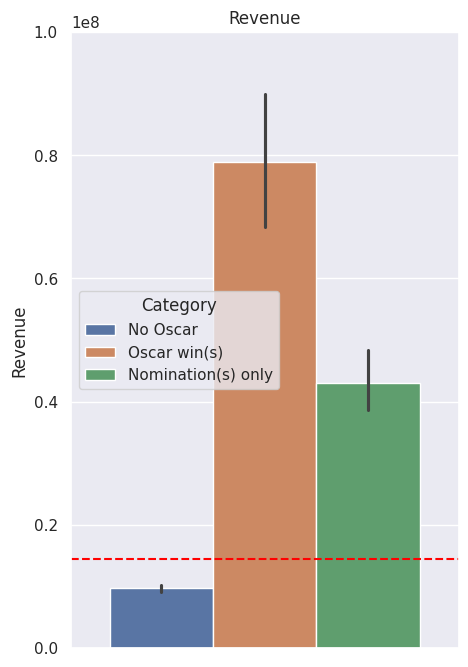

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")

mean_revenue = df["revenue"].mean()

#sns.set_theme(rc={'figure.figsize':(5,8)})

sns.barplot(data=df, y="revenue", hue="overall_category")
plt.ylabel("Revenue")
plt.title("Revenue")
plt.legend(title="Category")
plt.ylim(0, 1.0e8)
plt.axhline(mean_revenue, ls="--", c="red", label="Mean revenue")
plt.savefig("/content/drive/MyDrive/DSE_503/" "noms_wins_none_revenue" + ".png")
plt.show()


<ipython-input-103-935442d1a995>:1: DtypeWarning: Columns (20,21,23,24,26,27,28,29,31,32,33,34,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")


Mean revenue: 14403820.00706784


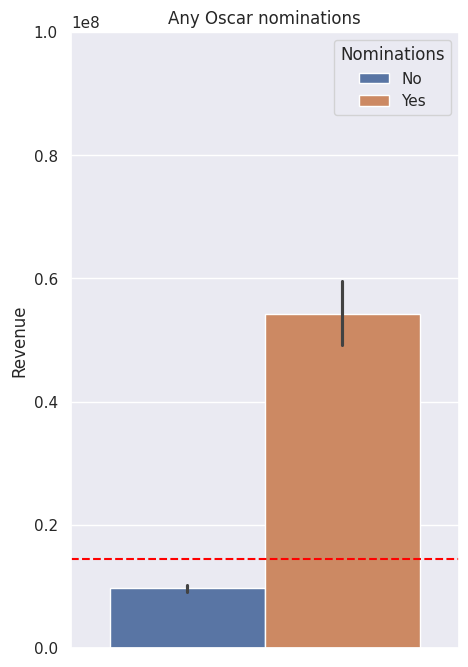

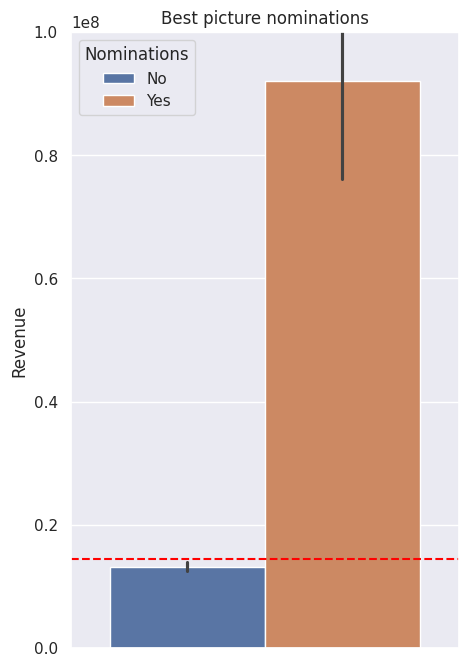

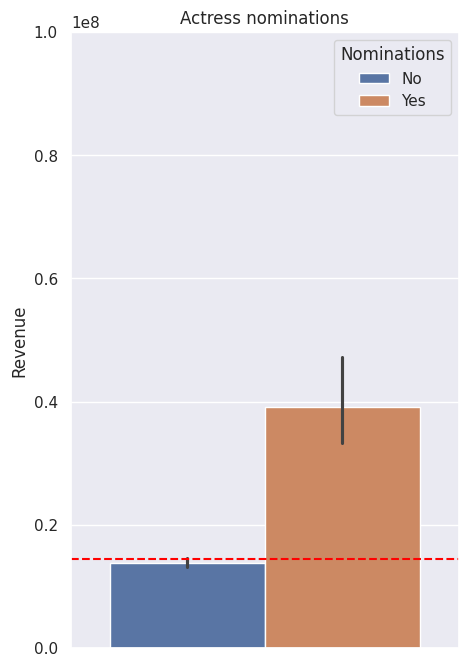

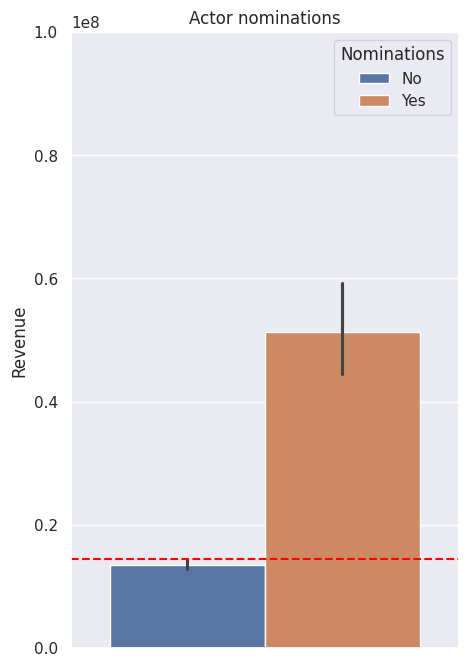

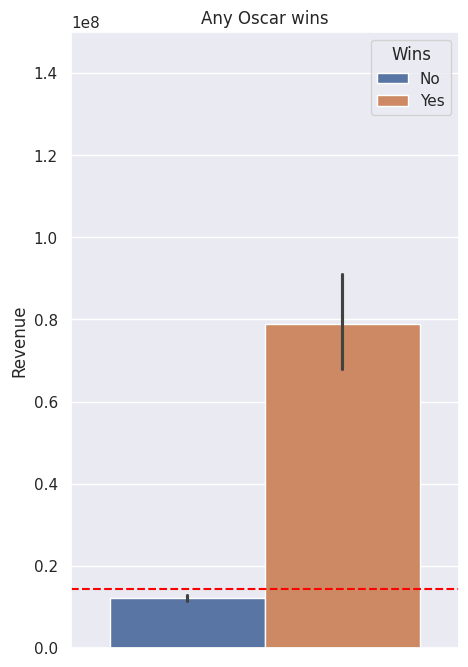

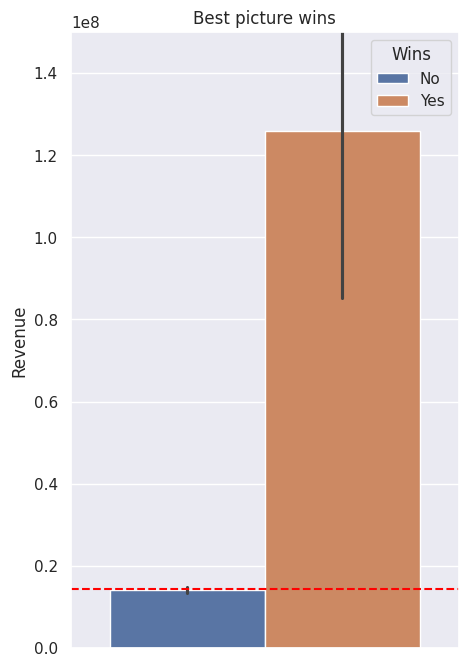

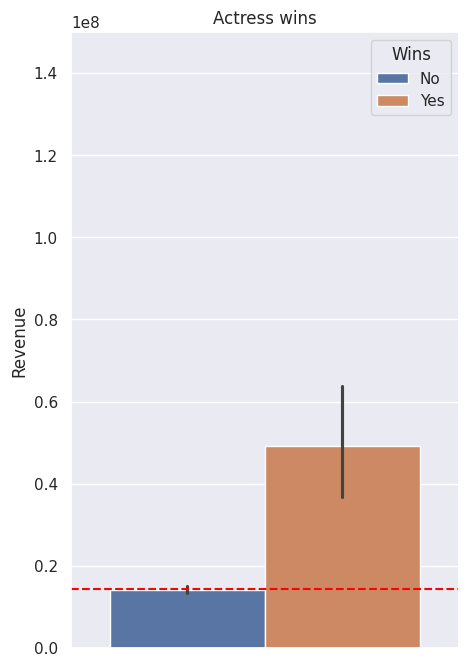

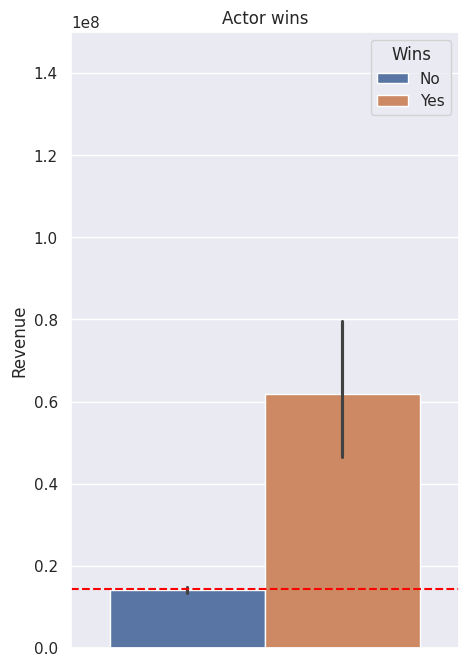

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")

# Can't analyze revenue without data so eliminate the NAs
df = df[df["revenue"].notna()]
# print("Revenue NAs dropped:", df.shape)


sns.set_theme(rc={'figure.figsize':(5,8)})
mean_revenue = df["revenue"].mean()
print("Mean revenue:", mean_revenue)

def nomination_revenue_plot(category, my_title):
  sns.barplot(data=df, y="revenue", hue=category)
  plt.ylabel("Revenue")
  plt.title(my_title)
  plt.legend(title="Nominations")
  plt.ylim(0, 1.0e8)
  plt.axhline(mean_revenue, ls="--", c="red", label="Mean revenue")
  plt.savefig("/content/drive/MyDrive/DSE_503/" + category + "_revenue" + ".png")
  plt.show()

def winner_revenue_plot(category, my_title):
  sns.barplot(data=df, y="revenue", hue=category)
  plt.ylabel("Revenue")
  plt.title(my_title)
  plt.legend(title="Wins")
  plt.ylim(0, 1.5e8)
  plt.axhline(mean_revenue, ls="--", c="red", label="Mean revenue")
  plt.savefig("/content/drive/MyDrive/DSE_503/" + category + "_revenue" + ".png")
  plt.show()


nomination_revenue_plot("any_noms", "Any Oscar nominations")
nomination_revenue_plot("film_noms", "Best picture nominations")
nomination_revenue_plot("actress_noms", "Actress nominations")
nomination_revenue_plot("actor_noms", "Actor nominations")



# # Wins
winner_revenue_plot("any_wins", "Any Oscar wins")
winner_revenue_plot("film_wins", "Best picture wins")
winner_revenue_plot("actress_wins", "Actress wins")
winner_revenue_plot("actor_wins", "Actor wins")





<ipython-input-104-7d46c87f6345>:3: DtypeWarning: Columns (20,21,23,24,26,27,28,29,31,32,33,34,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")
<ipython-input-104-7d46c87f6345>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {"revenue":"Revenue"}, inplace = True)


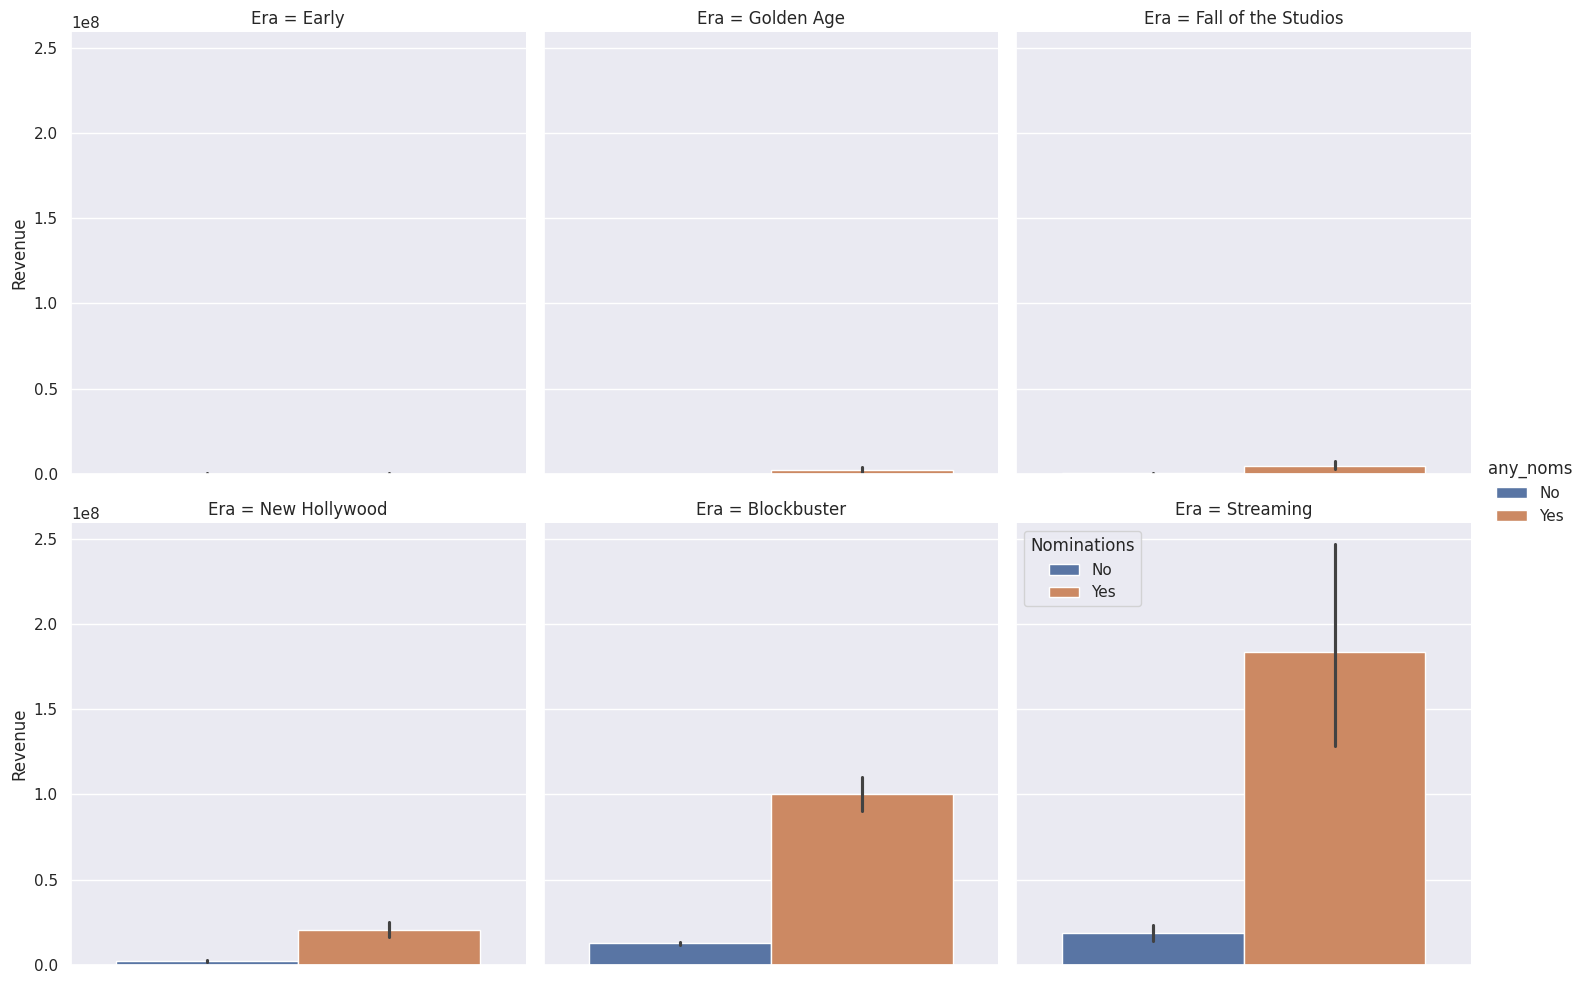

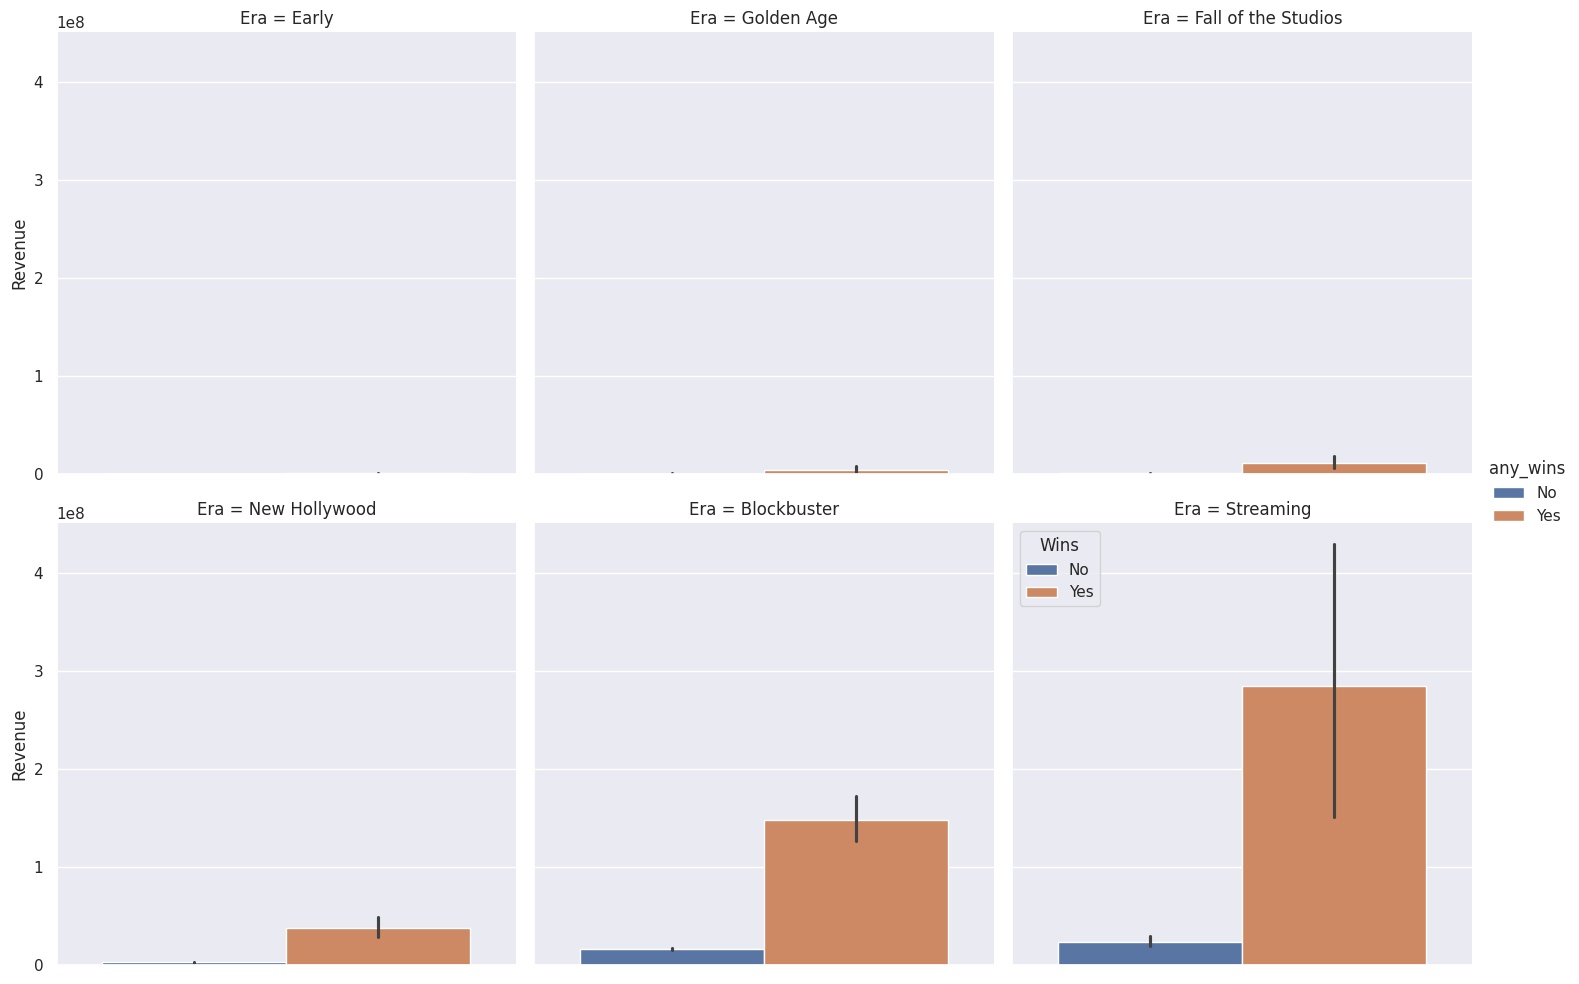

In [ ]:
# Revenue over the eras

df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")
# print("Untrimmed df:" , df.shape)

# Can't analyze revenue without data so eliminate the NAs
df = df[df["revenue"].notna()]
# print("Revenue NAs dropped:", df.shape)


df = df[df["Era"] != "Unknown"]
df.rename(columns = {"revenue":"Revenue"}, inplace = True)

#sns.set_theme(rc={'figure.figsize':(5,8)})

facet_order = ["Early", "Golden Age", "Fall of the Studios", "New Hollywood", "Blockbuster", "Streaming"]

sns.catplot(kind="bar",data=df,y="Revenue",hue="any_noms",col="Era",log_scale=None, col_wrap=3, col_order = facet_order)
plt.ylabel("Revenue")
plt.legend(title="Nominations", loc="upper left")
plt.savefig("/content/drive/MyDrive/DSE_503/" +"revenue_noms_eras.png")
plt.show()

sns.catplot(kind="bar",data=df,y="Revenue",hue="any_wins",col="Era",log_scale=None, col_wrap=3, col_order = facet_order)
plt.ylabel("Revenue")
plt.legend(title="Wins", loc="upper left") #FIXME double legends; cropped out manually in presentation and report
plt.savefig("/content/drive/MyDrive/DSE_503/" + "revenue_wins_eras.png")
plt.show()



<ipython-input-106-2f559faf7a5c>:3: DtypeWarning: Columns (20,21,23,24,26,27,28,29,31,32,33,34,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")


Mean rating: 6.098357404251753


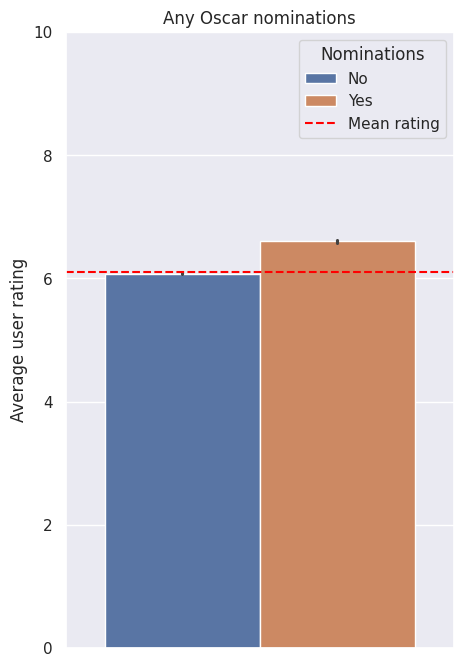

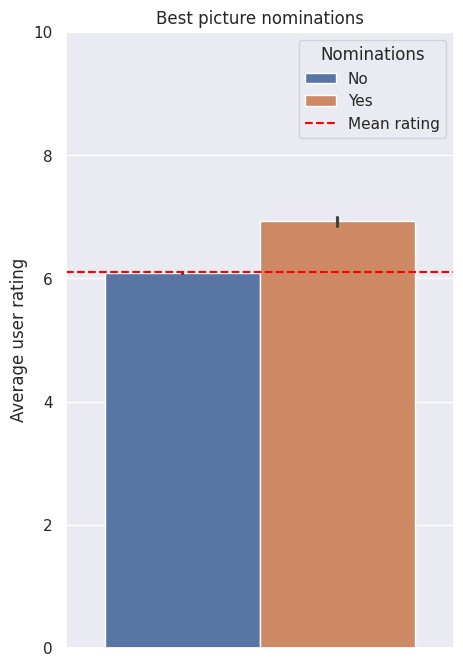

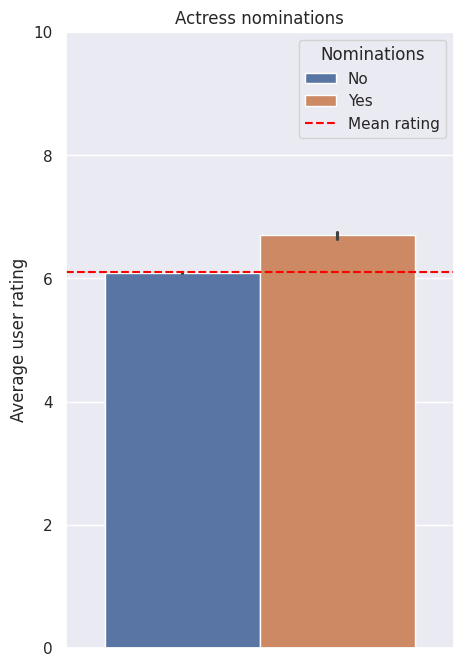

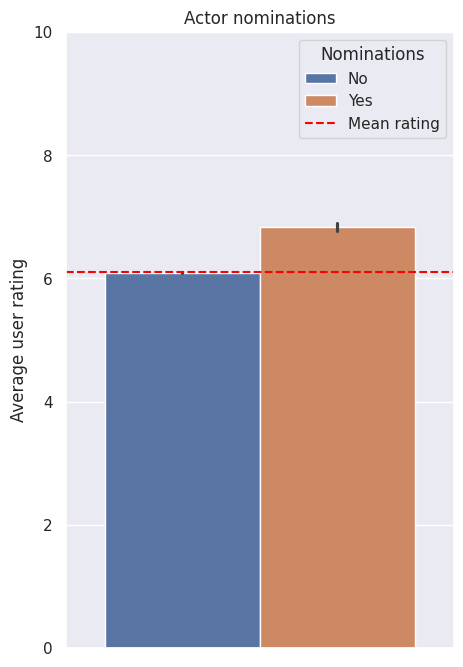

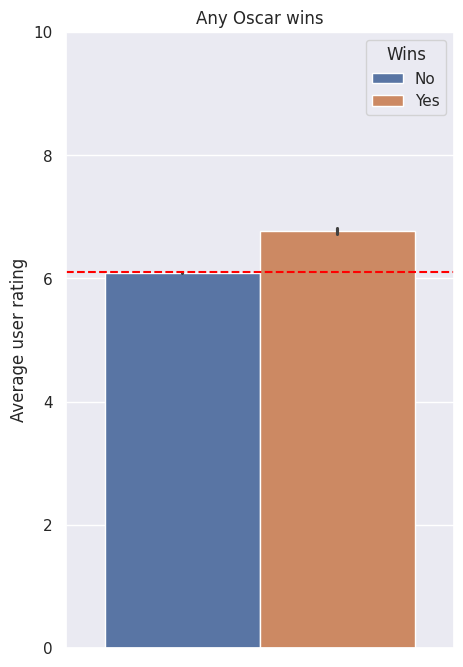

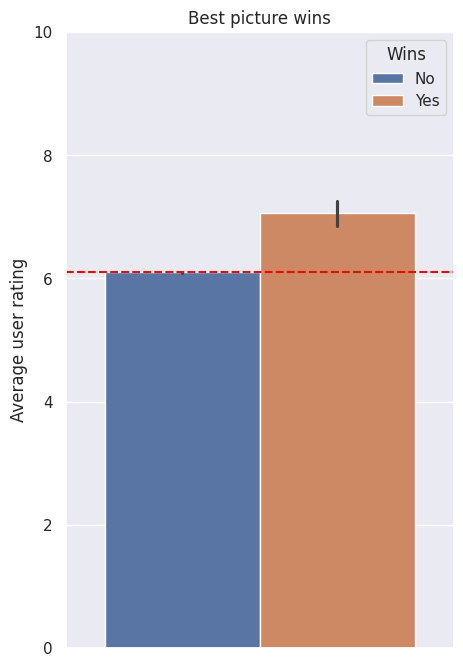

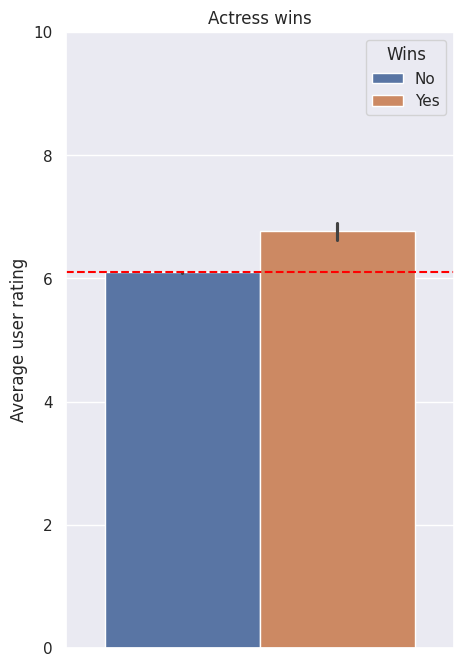

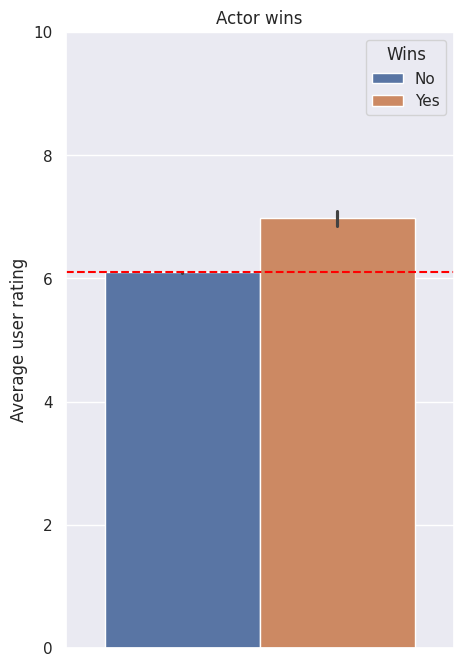

In [ ]:
# Different bar charts for different Oscar categories

df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")


# Can't analyze ratings without data so eliminate the NAs
df = df[df["averageRating"].notna()]


sns.set_theme(rc={'figure.figsize':(5,8)})
mean_rating = df["averageRating"].mean()
print("Mean rating:", mean_rating)

def nomination_rating_plot(category, my_title):
  sns.barplot(data=df, y="averageRating", hue=category)
  plt.ylabel("Average user rating")
  plt.title(my_title)
  plt.legend(title="Nominations")
  plt.ylim(0, 10)
  plt.axhline(mean_rating, ls="--", c="red", label="Mean rating")
  plt.legend(title="Nominations")
  plt.savefig("/content/drive/MyDrive/DSE_503/" + category + "_rating" + ".png")
  plt.show()

def winner_rating_plot(category, my_title):
  sns.barplot(data=df, y="averageRating", hue=category)
  plt.ylabel("Average user rating")
  plt.title(my_title)
  plt.legend(title="Wins")
  plt.ylim(0, 10)
  plt.axhline(mean_rating, ls="--", c="red", label="Mean rating")
  plt.savefig("/content/drive/MyDrive/DSE_503/" + category + "_rating" + ".png")
  plt.show()


nomination_rating_plot("any_noms", "Any Oscar nominations")
nomination_rating_plot("film_noms", "Best picture nominations")
nomination_rating_plot("actress_noms", "Actress nominations")
nomination_rating_plot("actor_noms", "Actor nominations")



# # Wins
winner_rating_plot("any_wins", "Any Oscar wins")
winner_rating_plot("film_wins", "Best picture wins")
winner_rating_plot("actress_wins", "Actress wins")
winner_rating_plot("actor_wins", "Actor wins")

<ipython-input-11-dd7b44e3c221>:3: DtypeWarning: Columns (20,21,23,24,26,27,28,29,31,32,33,34,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")


Correllation coefficient for revenue and ratings: 0.09981838054840439


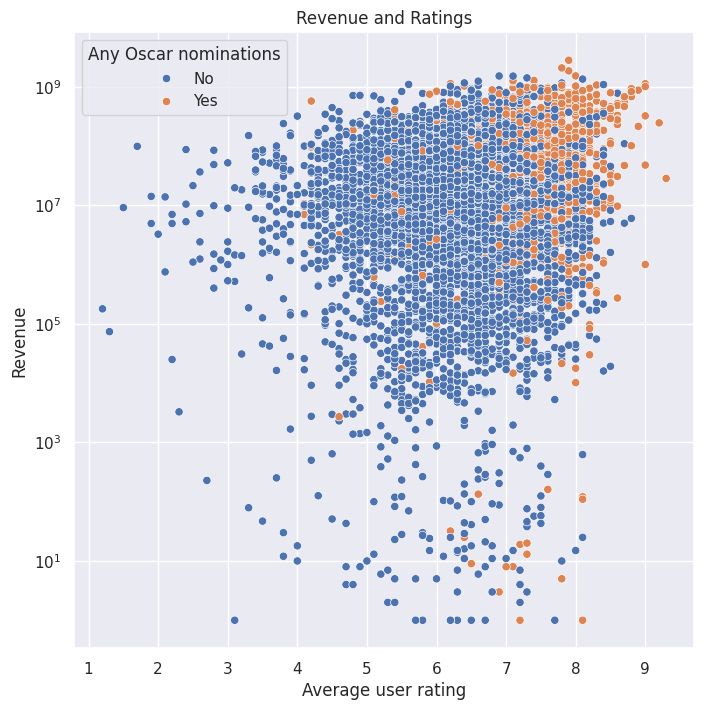

Correllation coefficient for revenue and ratings, no Oscar noms: 0.04013134065498062
Correllation coefficient for revenue and ratings, with Oscar noms: 0.18348231876418258


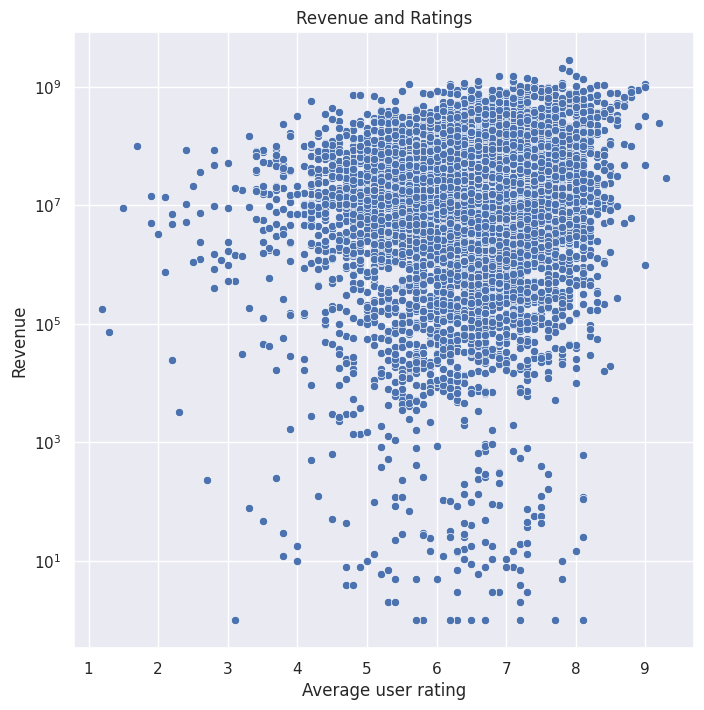

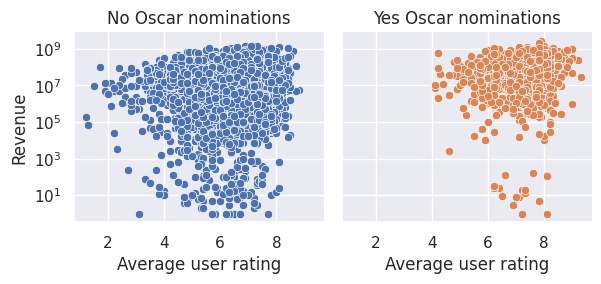

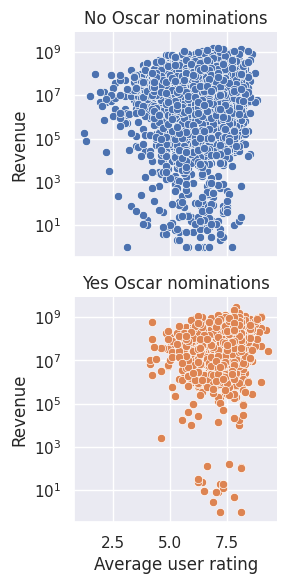

In [ ]:
# Compare ratings to revenue

df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")

sns.set_theme(rc={'figure.figsize':(8,8)})


print("Correllation coefficient for revenue and ratings:", df['revenue'].corr(df['averageRating']))

sns.scatterplot(data=df, x = "averageRating", y="revenue", hue = "any_noms")
plt.ylabel("Revenue")
plt.yscale("log")
plt.legend(title="Any Oscar nominations")
plt.xlabel("Average user rating")
plt.title("Revenue and Ratings")
plt.savefig("/content/drive/MyDrive/DSE_503/" + "ratings_revenue_color_noms" + ".png")
plt.show()

no_noms = df[df["any_noms"] == "No"]
print("Correllation coefficient for revenue and ratings, no Oscar noms:", no_noms['revenue'].corr(no_noms['averageRating']))
yes_noms = df[df["any_noms"] == "Yes"]
print("Correllation coefficient for revenue and ratings, with Oscar noms:", yes_noms['revenue'].corr(yes_noms['averageRating']))


sns.scatterplot(data=df, x = "averageRating", y="revenue")
plt.ylabel("Revenue")
plt.yscale("log")
#plt.legend(title="Any Oscar nominations")
plt.xlabel("Average user rating")
plt.title("Revenue and Ratings")
plt.savefig("/content/drive/MyDrive/DSE_503/" + "ratings_revenue" + ".png")
plt.show()

# sns.regplot(data=df, x = "averageRating", y="revenue").set(yscale="log")
# plt.show()

# sns.lmplot(data = df, x = "averageRating", y="revenue", col = "any_noms", hue = "any_noms")
# plt.yscale("log")
# plt.show()

p = sns.FacetGrid(df, col="any_noms", hue="any_noms")
p.map(sns.scatterplot, "averageRating", "revenue")
plt.yscale("log")
p.set_titles(col_template="{col_name} Oscar nominations")
p.set_axis_labels("Average user rating", "Revenue")
plt.savefig("/content/drive/MyDrive/DSE_503/" + "ratings_revenue_noms_facet" + ".png")
#plt.title("Revenue and Ratings")
plt.show()

# different arrangement of the same graph
p = sns.FacetGrid(df, row="any_noms", hue="any_noms")
p.map(sns.scatterplot, "averageRating", "revenue")
plt.yscale("log")
p.set_titles(row_template="{row_name} Oscar nominations")
p.set_axis_labels("Average user rating", "Revenue")
plt.savefig("/content/drive/MyDrive/DSE_503/" + "ratings_revenue_noms_facet_row.png")
#plt.title("Revenue and Ratings")
plt.show()

<ipython-input-13-1b2148c82a87>:3: DtypeWarning: Columns (20,21,23,24,26,27,28,29,31,32,33,34,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")


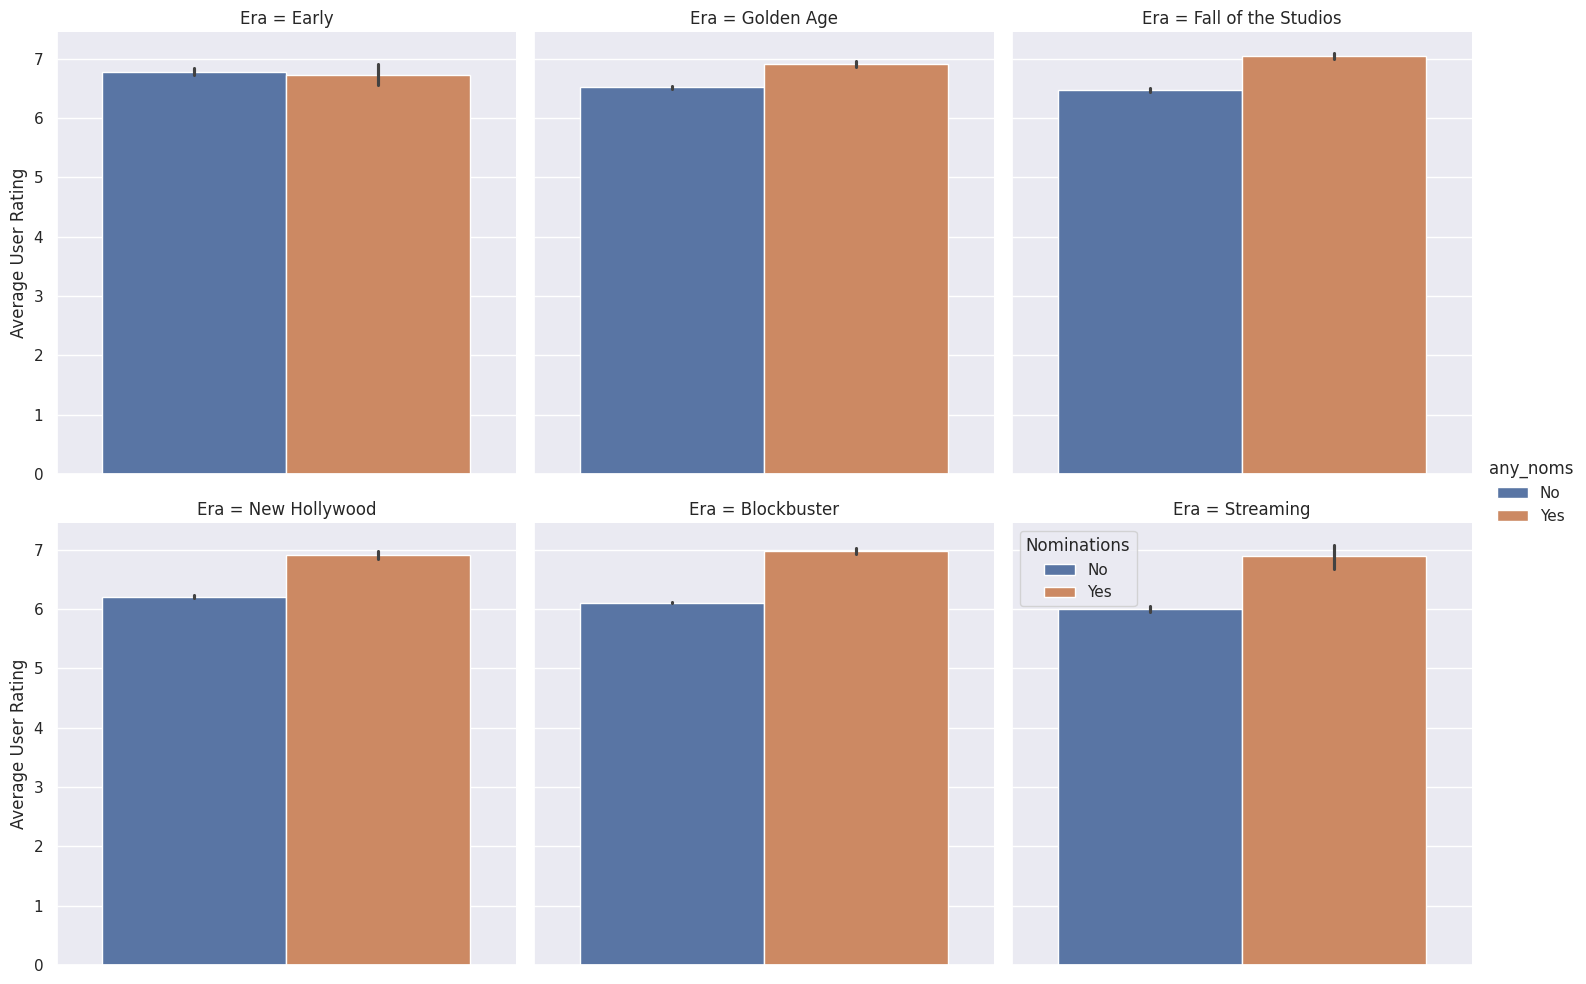

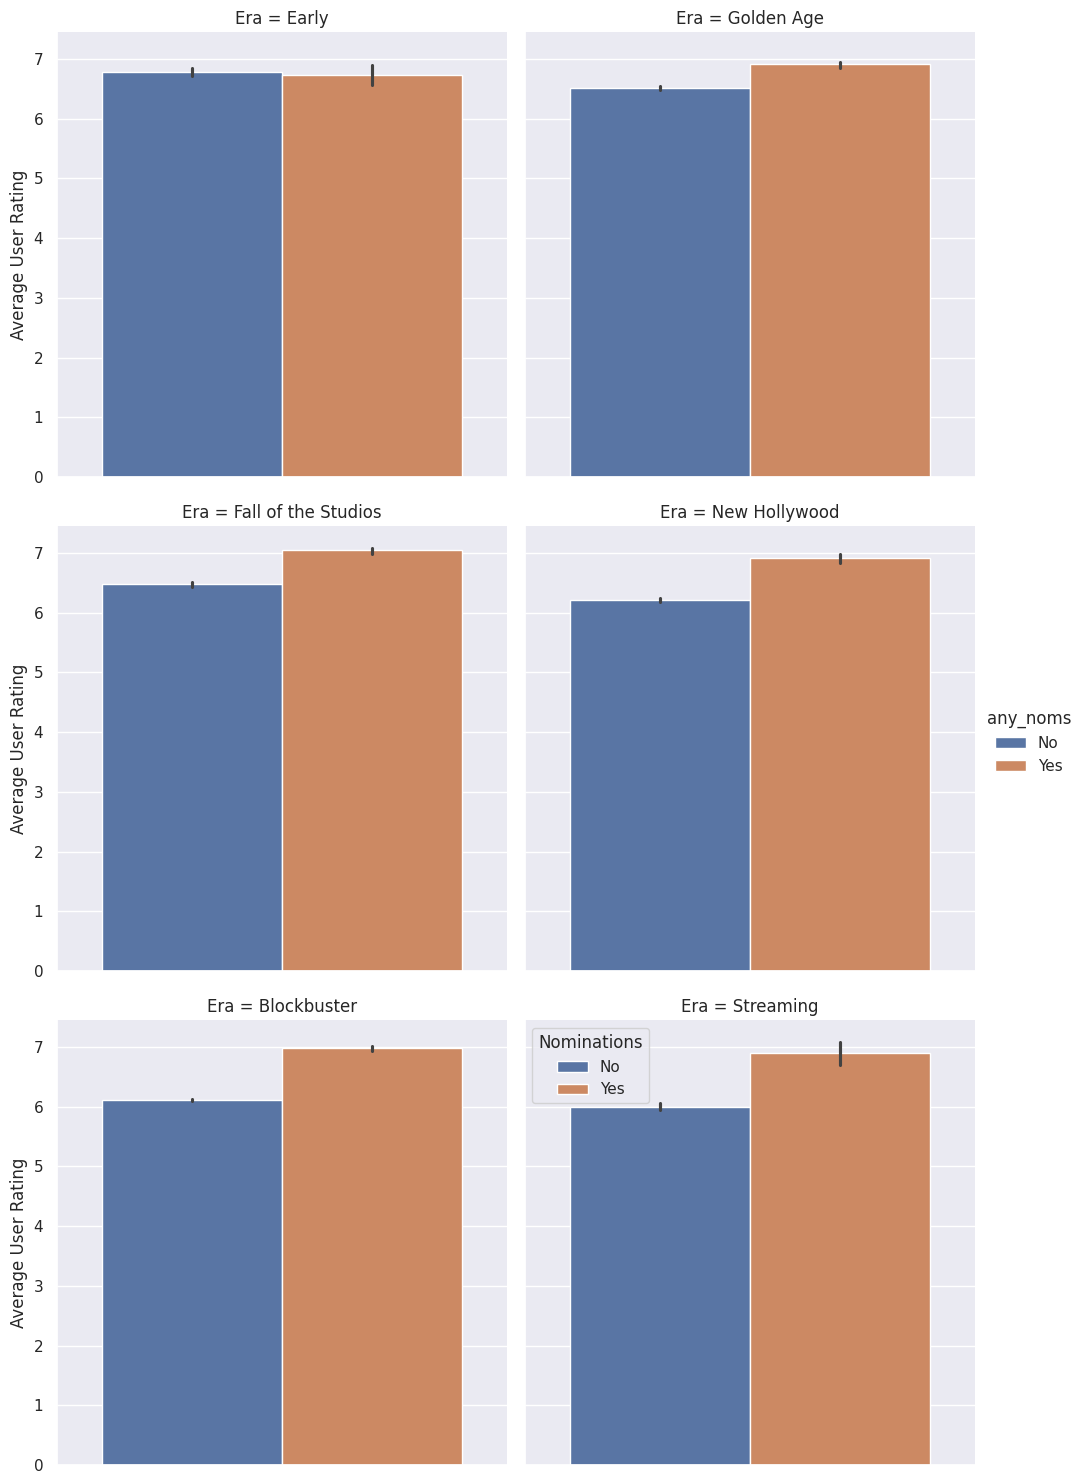

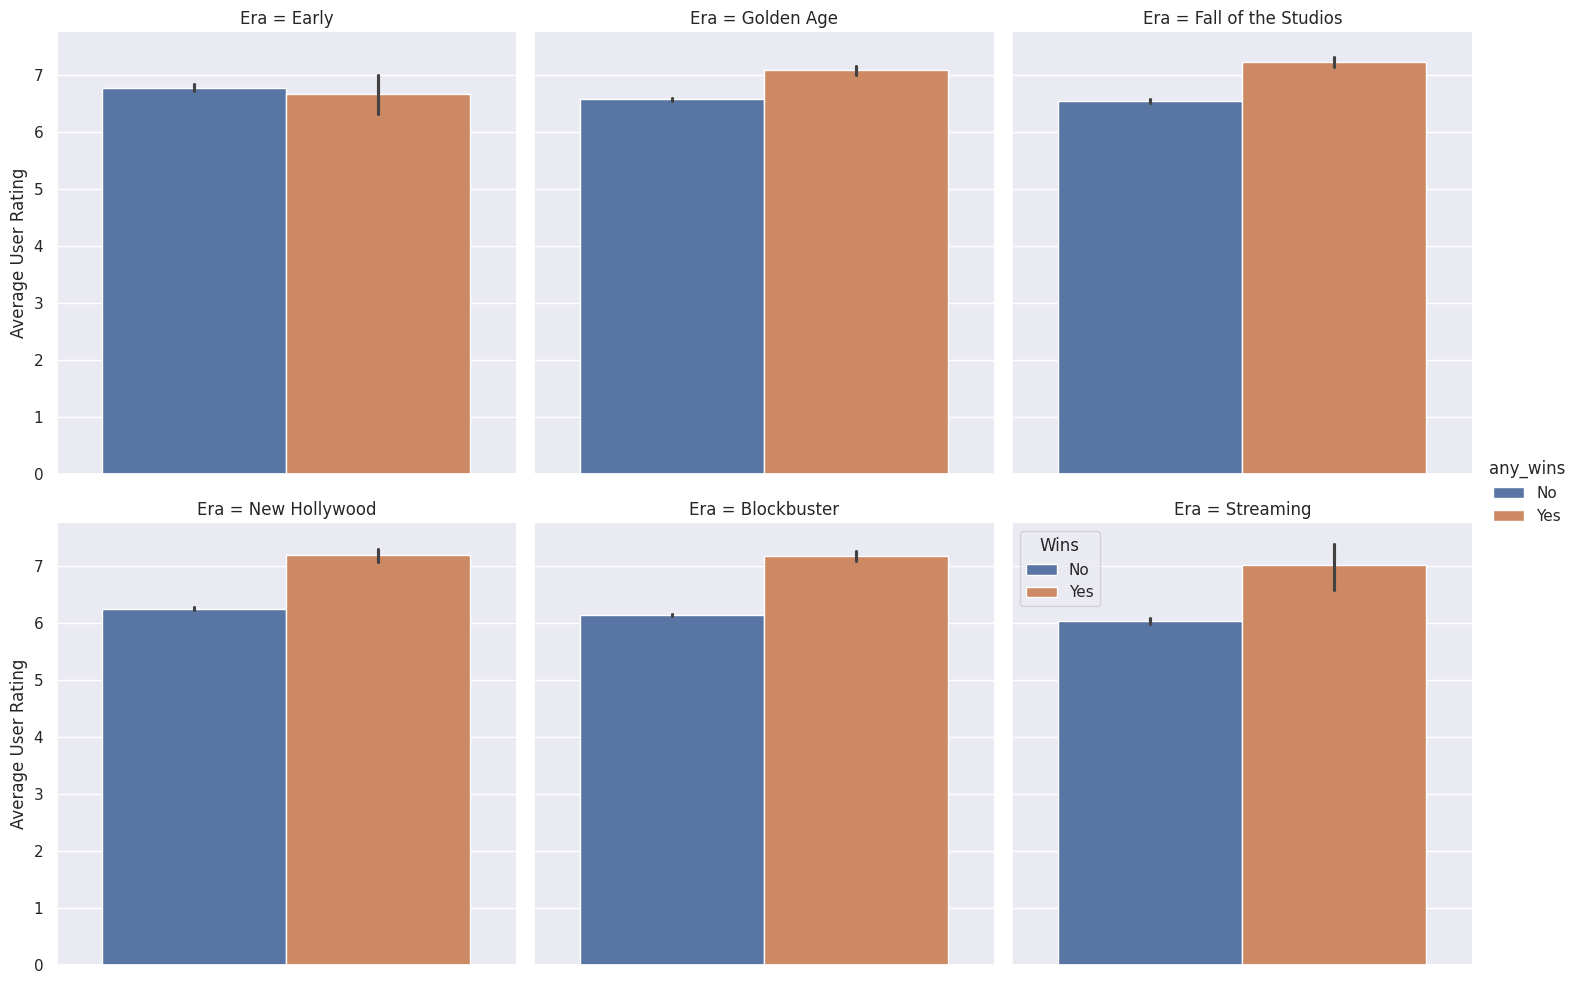

In [ ]:
# Ratings over the eras

df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")
# print("Untrimmed df:" , df.shape)

# Can't analyze ratings without data so eliminate the NAs
df = df[df["revenue"].notna()]


df = df[df["Era"] != "Unknown"]


#sns.set_theme(rc={'figure.figsize':(5,8)})

facet_order = ["Early", "Golden Age", "Fall of the Studios", "New Hollywood", "Blockbuster", "Streaming"]



df.rename(columns = {"averageRating":"Average User Rating"}, inplace = True)

sns.catplot(kind="bar",data=df,y="Average User Rating",hue="any_noms",col="Era",log_scale=None, col_wrap=3, col_order = facet_order)
plt.legend(title="Nominations", loc="upper left")
# plt.set_ylabel("Average user rating")
plt.savefig("/content/drive/MyDrive/DSE_503/" + "ratings_noms_eras.png")
plt.show()

# same analysis as above, different facet arrangement
sns.catplot(kind="bar",data=df,y="Average User Rating",hue="any_noms",col="Era",log_scale=None, col_wrap=2, col_order = facet_order)
plt.legend(title="Nominations", loc="upper left")
# plt.set_ylabel("Average user rating")
plt.savefig("/content/drive/MyDrive/DSE_503/" + "ratings_noms_eras_tall.png")
plt.show()

sns.catplot(kind="bar",data=df,y="Average User Rating",hue="any_wins",col="Era",log_scale=None, col_wrap=3, col_order = facet_order)
plt.legend(title="Wins", loc="upper left")
# plt.set_ylabel("Average user rating")
# plt.ylim(0, 10)
# plt.axhline(mean_revenue, ls="--", c="red", label="Mean rating")
plt.savefig("/content/drive/MyDrive/DSE_503/" + "ratings_wins_eras.png")
plt.show()

<ipython-input-109-0591407c0554>:1: DtypeWarning: Columns (20,21,23,24,26,27,28,29,31,32,33,34,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")


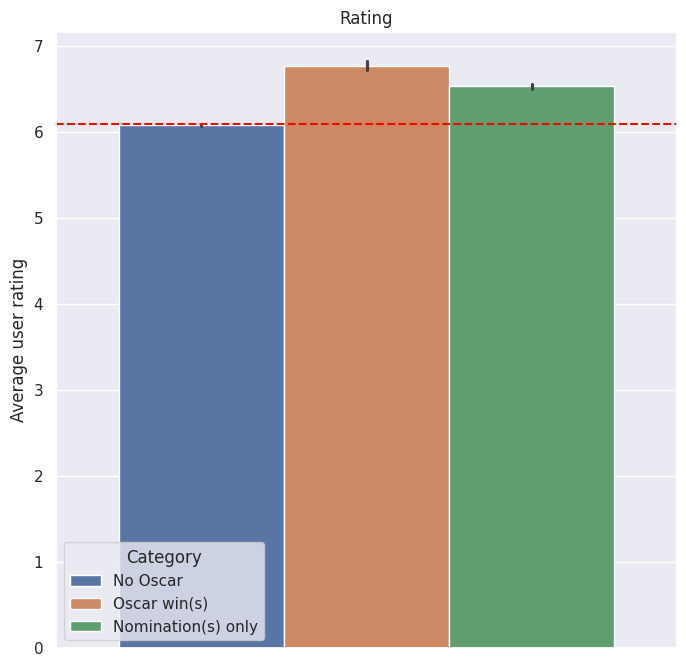

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DSE_503/titles_ratings_revenue_oscars_summary.csv")

mean_rating = df["averageRating"].mean()

#sns.set_theme(rc={'figure.figsize':(5,8)})

sns.barplot(data=df, y="averageRating", hue="overall_category")
plt.ylabel("Average user rating")
plt.title("Rating")
plt.legend(title="Category")
plt.axhline(mean_rating, ls="--", c="red", label="Mean rating")
plt.savefig("/content/drive/MyDrive/DSE_503/" "noms_wins_none_rating" + ".png")
plt.show()

In [ ]:
print("Total execution time is:" , time.time() - start_time)

Total execution time is: 1279.896125793457


Chat GPT disclosure: https://chatgpt.com/share/66d4e8dc-16e3-4943-81b4-41cabc4ba192